Based on https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/Day%2013%20SVM.md

# The Data Set We Will Use

In [16]:
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')

print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [17]:
X = dataset.iloc[:, [2, 3]].values

y = dataset.iloc[:, 4].values

# Splitting the Data Set Into Training Data and Test Data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scaling the Data Sets

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

# In the logistic regression example X-test used just transform. The outcome is the same.

# Training The Support Vector Machines Model

In [20]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

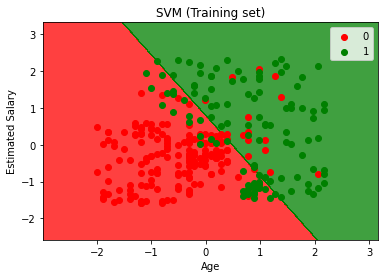

In [21]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['r', 'g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(['r', 'g'])(i), label = j)
    
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Making Predictions With Our Support Vector Machines Model

In [22]:
y_pred = classifier.predict(X_test)

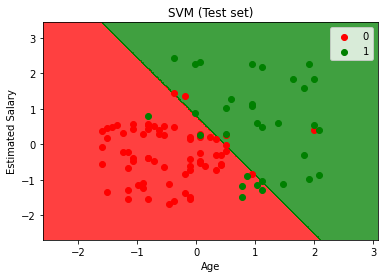

In [23]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['r', 'g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(['r', 'g'])(i), label = j)
    
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Measuring the Performance of Our Support Vector Machine Model

## Using the Classification Report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.83      0.78      0.81        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



## Using the Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[63,  5],
       [ 7, 25]])

### Visualise the Confusion Matrix

<AxesSubplot:>

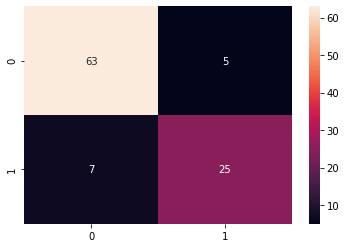

In [26]:
#See Keith Galli tutorial

#labels = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.GROCERY, Category.PATIO]
#cm = confusion_matrix(test_y, y_pred, labels=labels)
#df_cm = pd.DataFrame(cm, index=labels, columns=labels)

import seaborn as sn

df_cm = pd.DataFrame(cm)

sn.heatmap(df_cm, annot=True, fmt='d')

### Improving Confusion Matrix Visualisation

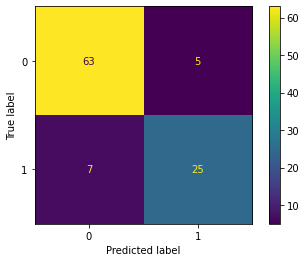

In [27]:
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

plot_confusion_matrix(classifier, X_test, y_test)

plt.show()

# Conclusion
f1_score of logistic regression is higher than svm.
@todo trying different parameters to improve results